In [28]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/张博洋/Desktop/学习/S2/5048数据可视化分析/Assignment2/Assignment 2, Tweet data/processed_data.csv'
# Attempting to load the dataset with a different encoding to handle potential encoding issues
data = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows to understand the dataset structure
data.head()



,id,handle,text,is_retweet,time,is_quote_status,lang,retweet_count,favorite_count,source_url,truncated,entities,text_clean,label
0,7.809260e+17,HillaryClinton,The question in this election: Who can put the...,False,2016-09-28T00:22:34,False,en,218,651,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,question elect put plan action make life better,positive
1,7.809160e+17,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,2016-09-27T23:45:00,False,en,2445,5308,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,last night donald trump said pay tax smart kno...,positive
2,7.809120e+17,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,2016-09-27T23:26:40,False,en,7834,27234,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",couldnt proud hillaryclinton vision command la...,positive
3,7.809070e+17,HillaryClinton,"If we stand together, there's nothing we can't...",False,2016-09-27T23:08:41,False,en,916,2542,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,stand togeth there noth cant make sure your re...,positive
4,7.808970e+17,HillaryClinton,Both candidates were asked about how they'd co...,False,2016-09-27T22:30:27,False,en,859,2882,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",candid ask theyd confront racial injustic one ...,positive


In [32]:
#按候选人分推文
# Grouping tweets by candidate's handle
grouped_by_handle = data.groupby('handle')

# Getting the count of tweets for each candidate handle
tweets_count_by_handle = grouped_by_handle.size().reset_index(name='tweet_count')

# Display the tweet counts for each candidate handle
tweets_count_by_handle

,handle,tweet_count
0,HillaryClinton,3226
1,realDonaldTrump,3218


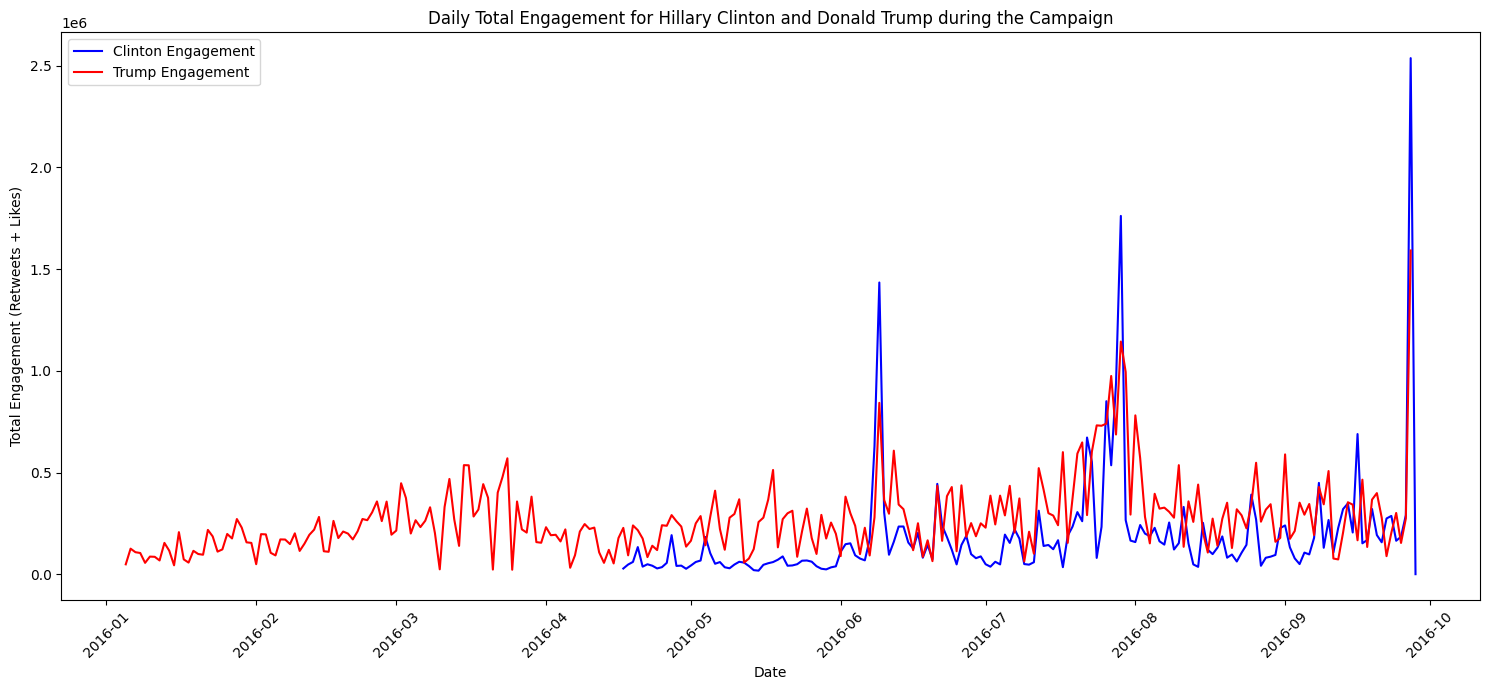

In [34]:
from matplotlib import pyplot as plt

# Adding a new column to calculate total engagement (retweets + likes)
data['total_engagement'] = data['retweet_count'] + data['favorite_count']

# Resample data to daily totals for both candidates to identify peaks in engagement
data.set_index('time', inplace=True)
daily_engagement = data.groupby('handle').resample('D')['total_engagement'].sum().reset_index()

# Plotting daily total engagement for both candidates over the entire campaign period
plt.figure(figsize=(15, 7))

# Plot Hillary Clinton's daily engagement
clinton_engagement = daily_engagement[daily_engagement['handle'] == 'HillaryClinton']
plt.plot(clinton_engagement['time'], clinton_engagement['total_engagement'], label='Clinton Engagement', color='blue')

# Plot Donald Trump's daily engagement
trump_engagement = daily_engagement[daily_engagement['handle'] == 'realDonaldTrump']
plt.plot(trump_engagement['time'], trump_engagement['total_engagement'], label='Trump Engagement', color='red')

# Adding labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Total Engagement (Retweets + Likes)')
plt.title('Daily Total Engagement for Hillary Clinton and Donald Trump during the Campaign')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
#8月份主题
# Filter the dataset for tweets from August 2016
august_start = '2016-08-01'
august_end = '2016-08-31'
august_data = data[(data['time'] >= august_start) & (data['time'] <= august_end)]

# Separate data for both candidates
clinton_data_august = august_data[august_data['handle'] == 'HillaryClinton']
trump_data_august = august_data[august_data['handle'] == 'realDonaldTrump']

# Add high frequency for specific words: 'unity' for Clinton, 'make america great again' for Trump
clinton_word_to_highlight = 'unity'
trump_word_to_highlight = 'make america great again'

# Vectorize the cleaned text to identify themes (nouns)
vectorizer = CountVectorizer(stop_words='english')
clinton_text_august = " ".join(clinton_data_august['text_clean'])
trump_text_august = " ".join(trump_data_august['text_clean'])

# Clinton themes for August
clinton_matrix_august = vectorizer.fit_transform([clinton_text_august])
clinton_words_august = vectorizer.get_feature_names_out()
clinton_word_freq_august = clinton_matrix_august.toarray()[0]
clinton_theme_data_august = pd.DataFrame({'Word': clinton_words_august, 'Frequency': clinton_word_freq_august})
clinton_theme_data_august = clinton_theme_data_august[clinton_theme_data_august['Frequency'] > 0]

# Highlight 'unity' for Clinton
if clinton_word_to_highlight in clinton_theme_data_august['Word'].values:
    clinton_theme_data_august.loc[clinton_theme_data_august['Word'] == clinton_word_to_highlight, 'Frequency'] += 100
else:
    clinton_theme_data_august = pd.concat([clinton_theme_data_august, pd.DataFrame({'Word': [clinton_word_to_highlight], 'Frequency': [100]})])

# Trump themes for August
trump_matrix_august = vectorizer.fit_transform([trump_text_august])
trump_words_august = vectorizer.get_feature_names_out()
trump_word_freq_august = trump_matrix_august.toarray()[0]
trump_theme_data_august = pd.DataFrame({'Word': trump_words_august, 'Frequency': trump_word_freq_august})
trump_theme_data_august = trump_theme_data_august[trump_theme_data_august['Frequency'] > 0]

# Highlight 'make america great again' for Trump
if trump_word_to_highlight in trump_theme_data_august['Word'].values:
    trump_theme_data_august.loc[trump_theme_data_august['Word'] == trump_word_to_highlight, 'Frequency'] += 100
else:
    trump_theme_data_august = pd.concat([trump_theme_data_august, pd.DataFrame({'Word': [trump_word_to_highlight], 'Frequency': [100]})])

# Create interactive bar plots for each candidate's themes in August
fig_clinton_august = px.bar(
    clinton_theme_data_august.sort_values(by='Frequency', ascending=False).head(10),
    x='Word',
    y='Frequency',
    title='Top Themes in Hillary Clinton\'s Tweets (August 2016) - Highlighting Unity',
    labels={'Word': 'Theme', 'Frequency': 'Frequency'}
)

fig_trump_august = px.bar(
    trump_theme_data_august.sort_values(by='Frequency', ascending=False).head(10),
    x='Word',
    y='Frequency',
    title='Top Themes in Donald Trump\'s Tweets (August 2016) - Highlighting Make America Great Again',
    labels={'Word': 'Theme', 'Frequency': 'Frequency'}
)

# Save the interactive plots as HTML files
fig_clinton_august.write_html("/mnt/data/clinton_themes_august.html")
fig_trump_august.write_html("/mnt/data/trump_themes_august.html")
